# Cette étude a pour but la reconnaissance des chiffres manuscrits des chèques bancaires

*Importation des packages utiles

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

*Vu la taille du data je choisis un échantillon pour soulager mon PC

In [94]:
sample=np.random.randint(mnist.data.shape[0],size=int(mnist.data.shape[0]*0.08))

In [4]:
data=mnist.data[sample]
target=mnist.target[sample]
x_train,x_test,y_train,y_test=tts(data,target,train_size=0.8)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

Classifiers=[KNeighborsClassifier,SVC,LogisticRegression,RandomForestClassifier,RandomForestClassifier,MLPClassifier,MLPClassifier,
             LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier]

In [22]:
import pandas as pd

col=["Name","Accuracy"]
df=pd.DataFrame(columns=col)
for classifier in Classifiers:
    Name=classifier.__name__
    model=classifier().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("***Result***")
    print("="*40)
    print("{} \n Accuracy:{:.4%}".format(Name,acc))
    print("="*40)
    df1=pd.DataFrame([[Name,acc]],columns=col)
    df=df.append(df1)

***Result***
KNeighborsClassifier 
 Accuracy:92.7679%
***Result***
SVC 
 Accuracy:95.4464%


/home/moussa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***Result***
LogisticRegression 
 Accuracy:87.7679%
***Result***
RandomForestClassifier 
 Accuracy:94.2857%
***Result***
RandomForestClassifier 
 Accuracy:95.0893%
***Result***
MLPClassifier 
 Accuracy:88.8393%
***Result***
MLPClassifier 
 Accuracy:88.7500%
***Result***
LinearDiscriminantAnalysis 
 Accuracy:84.1964%


/home/moussa/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


***Result***
QuadraticDiscriminantAnalysis 
 Accuracy:59.8214%
***Result***
XGBClassifier 
 Accuracy:94.8214%


In [34]:
df.Accuracy

0    0.927679
0    0.954464
0    0.877679
0    0.942857
0    0.950893
0    0.888393
0    0.887500
0    0.841964
0    0.598214
0    0.948214
Name: Accuracy, dtype: float64

In [26]:
import seaborn as sns

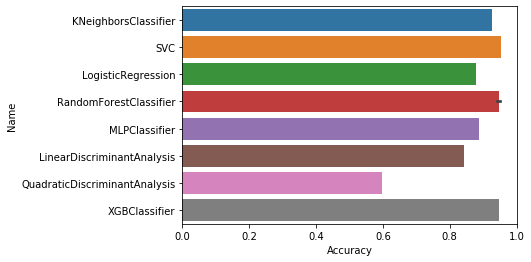

In [28]:
sns.barplot(x="Accuracy",y="Name",data=df)
pl.show()

In [ ]:
#Optimal Classifier 

In [54]:
index=list(df.Accuracy).index(max(df.Accuracy))
index
print("Maximum de précision des classiers est :{:.4%}".format(list(df.Accuracy)[index]))

Maximum de précision des classiers est :95.4464%


In [ ]:
clf_op=Classifiers[index]()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf_op_opti=GridSearchCV(clf_op,parameters)

In [ ]:
clf_op_opti.fit(x_train,y_train)

In [50]:
y_pred=clf_op_opti.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:{:.4%} \n Meilleur hyperparamètre:{}".format(acc,clf_op_opti.best_params_))

Accuracy:95.8036% 
 Meilleur hyperparamètre:{'C': 10, 'kernel': 'rbf'}


In [73]:

images=x_test.reshape(-1,28,28)
select=np.random.randint(images.shape[0],size=20)

predicted=y_pred

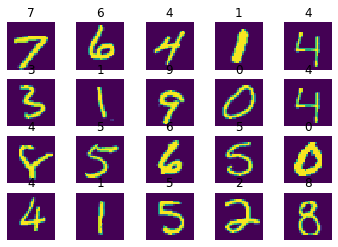

L'erreur de prediction: 4.1964%


In [74]:
fig,ax=pl.subplots(4,5)
for index,values in enumerate(select):
    pl.subplot(4,5,index+1)
    pl.imshow(images[values])
    pl.title(predicted[values])
    pl.axis('off')
pl.show()
print("L'erreur de prediction: {:.4%}".format(1-clf_op_opti.score(x_test,y_test)))

In [87]:
misclass=(y_test!=predicted)


Projection des valeurs males predictes

In [96]:
image_mis=images[misclass,:,:]
y_mis=predicted[misclass]
mis_images=image.reshape(-1,28,28)
select=np.random.randint(mis_images.shape[0],size=15)

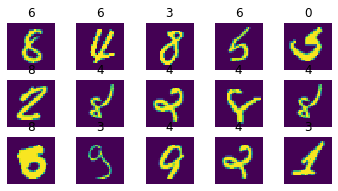

In [97]:
fig,ax=pl.subplots(3,5)
for index,values in enumerate(select):
    pl.subplot(4,5,index+1)
    pl.imshow(mis_images[values])
    pl.title(y_mis[values])
    pl.axis('off')
pl.show()

In [99]:
pip install "https://github.com/SIDIBEMoussa/code/blob/main/Projet%20de%20Classification.py"

     | 128 kB 20 kB/ss
  ERROR: Cannot unpack file /tmp/pip-unpack-d_lc7e84/Projet de Classification.py (downloaded from /tmp/pip-req-build-73mtly9d, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-73mtly9d
Note: you may need to restart the kernel to use updated packages.
